<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/treinandolimpeza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as libs
import pandas as pd
import statistics as sts
import seaborn as sns


1-importar bibliotecas
2-importar arquivo csv
3- entender os dados usando SHAPE, DESCRIBE, INFO
4- Tratara os NAs, Dados Inconsistes
5-Gerar graficos para visualizacao
6-Checar a limpeza


In [ ]:
#importando arquivo csv
tempo=pd.read_csv("/Volumes/Untitled/FormacaoCD/10.Pr†tica em Python/dados/tempo.csv", sep=";")
tempo.shape
tempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [ ]:
#agrupando aparencia para ver se tem escrita errada
aparencia_group=tempo.groupby(["Aparencia"]).size()
aparencia_group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [ ]:
#substituindo menos pela moda, e chamando o groupby para ver se a palavra menos foi corrigida
moda_aparencia=sts.mode(tempo["Aparencia"])
moda_aparencia
tempo.loc[tempo["Aparencia"].isin(["menos"]), "Aparencia"]=moda_aparencia
aparencia_group=tempo.groupby(["Aparencia"]).size()
aparencia_group




Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

<Axes: xlabel='Aparencia', ylabel='Count'>

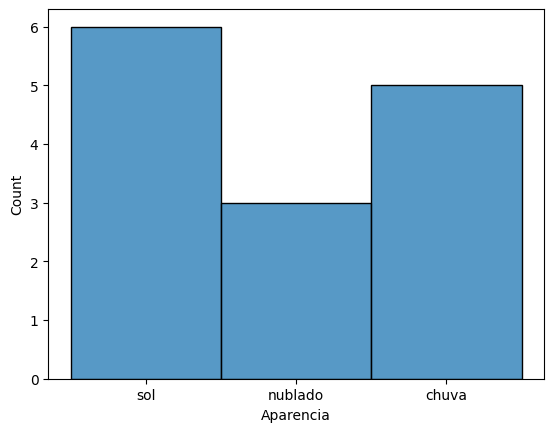

In [ ]:
#gerando histograma de aparencia
sns.histplot(tempo.Aparencia, kde=False)

In [ ]:
#agrupando temperatura
tempo_group=tempo.groupby([tempo["Temperatura"]]).size()
tempo_group

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

<Axes: xlabel='Temperatura', ylabel='Count'>

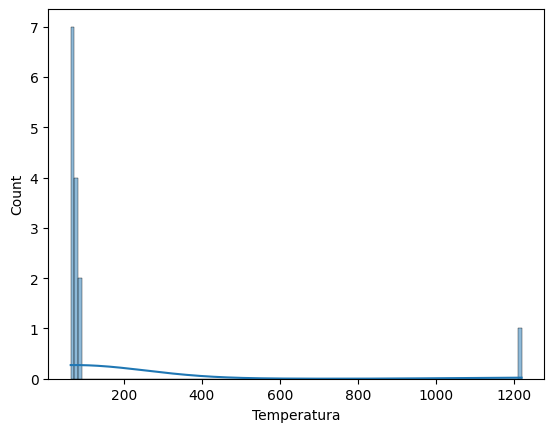

In [ ]:
sns.histplot(tempo["Temperatura"], kde=True)

<Axes: >

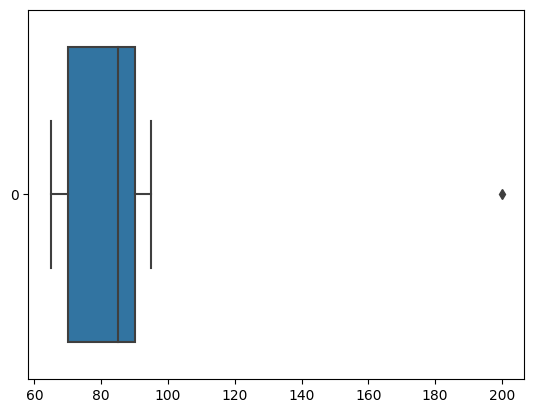

In [ ]:
#entendo coluna Umidade
tempo["Umidade"].describe()
sns.boxplot(tempo.Umidade, orient="h")


In [ ]:
#encontrano mediana da temperatura para substituir os Nan e outliers
median_umidade=sts.median(tempo["Umidade"])
median_umidade
tempo["Umidade"].fillna(median_umidade, inplace=True)
tempo.Umidade.describe()
tempo


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,sol,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [ ]:
#substituindo o outliers pelo mediana umidade 3* desv, calculando desvio padrao com statistic
desv_umidade=sts.stdev(tempo["Umidade"])
desv_umidade
tempo.loc[tempo["Umidade"]>= 3 * desv_umidade]






,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim


In [ ]:
tempo.loc[(tempo["Umidade"]< 0) | (tempo["Umidade"]>100)]




,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim
